In [51]:
import torch
from torch import Tensor
from typing import Tuple
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
#data loading
X_bw=pickle.load(open("X_bw_np_32186", 'rb'))
X_bw_nogen=pickle.load(open("X_bw_nogen_np_32186","rb"))
Titles_=pickle.load(open("Titles_np_32186","rb"))
Gen_=pickle.load(open("Gen_np_32186","rb"))

In [52]:
n=32186

Gen_=Gen_[:n]
Titles_=Titles_[:n]
X_bw=X_bw[:n]
X_bw_nogen=X_bw_nogen[:n]

Titles=[]
Gen=[]
for i in range(len(Titles_)):
    if Titles_[i]=="nurse" :
        Titles.append([1])
    else :
        Titles.append([0])
    if Gen_[i]=="F":
        Gen.append([1])
    else :
        Gen.append([0])

In [ ]:
Gen =torch.FloatTensor(Gen)
Titles = torch.FloatTensor(Titles) 
X_bw=torch.FloatTensor(X_bw.values.tolist())
X_bw_nogen=torch.FloatTensor(X_bw_nogen.values.tolist())

X_bw_train, X_bw_test, X_bw_nogen_train, X_bw_nogen_test, Titles_train, Titles_test, Gen_train, Gen_test = train_test_split(X_bw, X_bw_nogen, Titles, Gen, test_size = 0.4, random_state=0)

In [53]:
print(X_bw_test.shape)

torch.Size([12875, 1005])


## With gender information

In [54]:
#parameters
input_size = len(X_bw_train[0])
opti_lr = 1e-3 #the learning step

In [55]:
class Logistic_Reg_model(torch.nn.Module):
    def __init__(self,input_dim):
        super(Logistic_Reg_model,self).__init__()
        self.layer1=torch.nn.Linear(input_dim,1)
    def forward(self,x):
        y_predicted=torch.sigmoid(self.layer1(x))
        return y_predicted

In [56]:
model_log = Logistic_Reg_model(input_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model_log.parameters(), lr=opti_lr) 

outputs = model_log(X_bw_train)

In [57]:
y_pred=1*(outputs.flatten()>0.5)
y=Titles_train.flatten()

n=X_bw_train.shape[0]

obs_ids=np.arange(n)
np.random.shuffle(obs_ids)

In [58]:
number_of_epochs=20
mini_batch_size=100

n=X_bw_train.shape[0]

list_convergence=[]

for epoch in range(number_of_epochs): 
    obs_ids=np.arange(n)
    np.random.shuffle(obs_ids)
    
    start_curr_obs=0
    while start_curr_obs+mini_batch_size<n:  
        Curr_obs=obs_ids[start_curr_obs:start_curr_obs+mini_batch_size]
        
        optimizer.zero_grad()
        outputs = model_log(X_bw_train[Curr_obs,:])
        loss = criterion(outputs, Titles_train[Curr_obs]) 
        loss.backward() 
        optimizer.step() 
        
        start_curr_obs+=mini_batch_size
        
        y=Titles_train[Curr_obs].flatten()
        y_hat=(1*(outputs>0.5)).flatten()
        
        list_convergence.append(torch.mean(torch.abs(y-y_hat)).item())
    
    if (epoch+1)%1 == 0:
        y=Titles_train[Curr_obs].flatten()
        y_hat=(1*(outputs>0.5)).flatten()
        
        print('epoch:', epoch+1)
        print(' -> loss=',loss.item())
        print(' -> error rate:',torch.mean(torch.abs(y-y_hat)))

epoch: 1
 -> loss= 0.5298199653625488
 -> error rate: tensor(0.1800)
epoch: 2
 -> loss= 0.4748673737049103
 -> error rate: tensor(0.1700)
epoch: 3
 -> loss= 0.4604087173938751
 -> error rate: tensor(0.1200)
epoch: 4
 -> loss= 0.364236444234848
 -> error rate: tensor(0.1200)
epoch: 5
 -> loss= 0.39433524012565613
 -> error rate: tensor(0.1200)
epoch: 6
 -> loss= 0.3727198839187622
 -> error rate: tensor(0.1300)
epoch: 7
 -> loss= 0.3373611569404602
 -> error rate: tensor(0.0800)
epoch: 8
 -> loss= 0.32751795649528503
 -> error rate: tensor(0.0800)
epoch: 9
 -> loss= 0.3105278015136719
 -> error rate: tensor(0.0600)
epoch: 10
 -> loss= 0.32433077692985535
 -> error rate: tensor(0.1000)
epoch: 11
 -> loss= 0.36762890219688416
 -> error rate: tensor(0.1100)
epoch: 12
 -> loss= 0.25608837604522705
 -> error rate: tensor(0.0900)
epoch: 13
 -> loss= 0.3190109431743622
 -> error rate: tensor(0.1200)
epoch: 14
 -> loss= 0.29058003425598145
 -> error rate: tensor(0.1300)
epoch: 15
 -> loss= 0.28

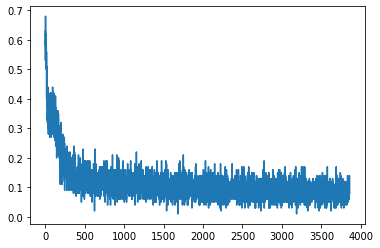

In [59]:
plt.plot(list_convergence)
plt.show()

In [60]:
prédiction=[]
for i in X_bw_test:
    if model_log(i) < 0.5 :
        prédiction.append([0])
    else:
         prédiction.append([1])
            
prédiction=torch.FloatTensor(prédiction)

print(accuracy_score(Titles_test[:,0], prédiction[:,0]))

0.9220970873786408


## Without gender information

In [61]:
#parameters
input_size = len(X_bw_nogen_train[0])
opti_lr = 1e-3

In [62]:
model_log = Logistic_Reg_model(input_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model_log.parameters(), lr=opti_lr)

outputs = model_log(X_bw_nogen_train)

In [63]:
y_pred=1*(outputs.flatten()>0.5)
y=Titles_train.flatten()

n=X_bw_train.shape[0]

obs_ids=np.arange(n)
np.random.shuffle(obs_ids)

In [64]:
model_log = Logistic_Reg_model(input_size)
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model_log.parameters(), lr=opti_lr) 

number_of_epochs=20
mini_batch_size=100

n=X_bw_nogen_train.shape[0]

list_convergence=[]

for epoch in range(number_of_epochs): 
    obs_ids=np.arange(n)
    np.random.shuffle(obs_ids)
    
    start_curr_obs=0
    while start_curr_obs+mini_batch_size<n:  
        Curr_obs=obs_ids[start_curr_obs:start_curr_obs+mini_batch_size]
        
        optimizer.zero_grad() 
        outputs = model_log(X_bw_nogen_train[Curr_obs,:])
        loss = criterion(outputs, Titles_train[Curr_obs]) 
        loss.backward()
        optimizer.step()
        
        start_curr_obs+=mini_batch_size
        
        y=Titles_train[Curr_obs].flatten()
        y_hat=(1*(outputs>0.5)).flatten()
        
        list_convergence.append(torch.mean(torch.abs(y-y_hat)).item())
    
    if (epoch+1)%1 == 0:
        y=Titles_train[Curr_obs].flatten()
        y_hat=(1*(outputs>0.5)).flatten()
        
        print('epoch:', epoch+1)
        print(' -> loss=',loss.item())
        print(' -> error rate:',torch.mean(torch.abs(y-y_hat)))


epoch: 1
 -> loss= 0.5667235851287842
 -> error rate: tensor(0.2400)
epoch: 2
 -> loss= 0.5075277090072632
 -> error rate: tensor(0.1700)
epoch: 3
 -> loss= 0.42724910378456116
 -> error rate: tensor(0.1100)
epoch: 4
 -> loss= 0.39079105854034424
 -> error rate: tensor(0.1300)
epoch: 5
 -> loss= 0.41451165080070496
 -> error rate: tensor(0.1700)
epoch: 6
 -> loss= 0.3925171196460724
 -> error rate: tensor(0.1000)
epoch: 7
 -> loss= 0.37130242586135864
 -> error rate: tensor(0.0800)
epoch: 8
 -> loss= 0.3440420627593994
 -> error rate: tensor(0.0900)
epoch: 9
 -> loss= 0.3734053075313568
 -> error rate: tensor(0.1500)
epoch: 10
 -> loss= 0.3388291299343109
 -> error rate: tensor(0.1200)
epoch: 11
 -> loss= 0.29844579100608826
 -> error rate: tensor(0.0900)
epoch: 12
 -> loss= 0.31711670756340027
 -> error rate: tensor(0.1000)
epoch: 13
 -> loss= 0.36808207631111145
 -> error rate: tensor(0.1800)
epoch: 14
 -> loss= 0.33159512281417847
 -> error rate: tensor(0.1100)
epoch: 15
 -> loss= 0

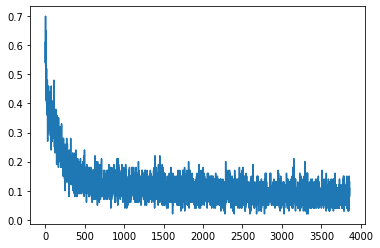

In [65]:
plt.plot(list_convergence)
plt.show()

In [66]:
prédiction=[]
for i in X_bw_nogen_test:
    if model_log(i) < 0.5 :
        prédiction.append([0])
    else:
         prédiction.append([1])
            
prédiction=torch.FloatTensor(prédiction)

print(accuracy_score(Titles_test[:,0], prédiction[:,0]))


0.9192233009708738
